# Model Creation with Train_data 

## Importing Libraries

In [5]:
# !pip install category_encoders 

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV

## Loading Data 

In [7]:
train_data = pd.read_csv('fraudTrain.csv')
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


## Analysing Data 

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

<AxesSubplot:>

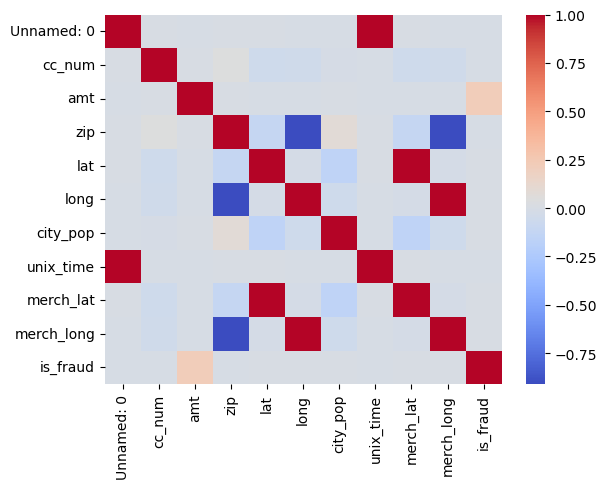

In [9]:
sns.heatmap(train_data.corr(), cmap = 'coolwarm')

In [10]:
train_data['merchant']

0                   fraud_Rippin, Kub and Mann
1              fraud_Heller, Gutmann and Zieme
2                         fraud_Lind-Buckridge
3           fraud_Kutch, Hermiston and Farrell
4                          fraud_Keeling-Crist
                          ...                 
1296670                      fraud_Reichel Inc
1296671               fraud_Abernathy and Sons
1296672                   fraud_Stiedemann Ltd
1296673    fraud_Reinger, Weissnat and Strosin
1296674    fraud_Langosh, Wintheiser and Hyatt
Name: merchant, Length: 1296675, dtype: object

## Data Preprocessing

In [11]:
data=  train_data[['merchant','category', 'amt',  'zip', 'job', 'unix_time', 'merch_lat','is_fraud']]
data.head()

,merchant,category,amt,zip,job,unix_time,merch_lat,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,28654,"Psychologist, counselling",1325376018,36.011293,0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,99160,Special educational needs teacher,1325376044,49.159047,0
2,fraud_Lind-Buckridge,entertainment,220.11,83252,Nature conservation officer,1325376051,43.150704,0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,59632,Patent attorney,1325376076,47.034331,0
4,fraud_Keeling-Crist,misc_pos,41.96,24433,Dance movement psychotherapist,1325376186,38.674999,0


In [12]:
corr_mat = data.corr()

<AxesSubplot:>

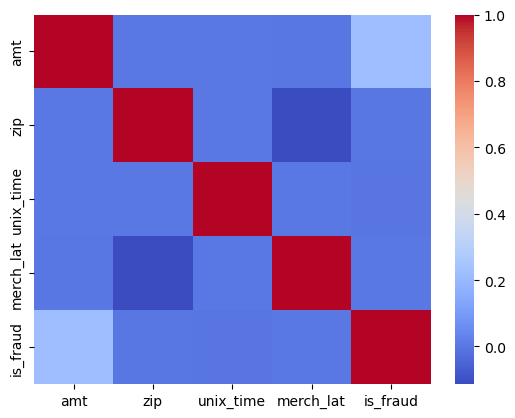

In [13]:
sns.heatmap(corr_mat, cmap = 'coolwarm')

In [14]:
data = data.drop(columns = 'merch_lat', axis = 1)

In [15]:
# using Label encoder to encode the merchant column
label_encoder = LabelEncoder()

data['merchant'] = label_encoder.fit_transform(data['merchant'])

In [16]:
# using Label encoder to encode the category column
data['category'] = label_encoder.fit_transform(data['category'])

In [17]:
# using Target Encoder from category encoders to encode job column 
encoder = ce.TargetEncoder(cols = ['job'])

data_encoded = encoder.fit_transform(data['job'],data['is_fraud'])

data['job'] = data_encoded

## Train Test Split 

In [18]:
x = data.drop(columns = 'is_fraud', axis = 1)
y = data['is_fraud']

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 1)

## Model Selection 

### Logistic Regression

In [20]:
lr_model = LogisticRegression()

lr_model.fit(x_train,y_train)
lr_model.score(x_test, y_test)

0.9944858966202017

### Random Forest Classifier

In [22]:
rfc_model = RandomForestClassifier()

rfc_model.fit(x_train, y_train)
y_pred = rfc_model.predict(x_test)

accuracy_score(y_test, y_pred)

0.9975629976671101

# Implementing Model On Test Data 

## Loading Data 

In [23]:
test_data = pd.read_csv('fraudTest.csv')
test_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


## Data Preprocessing

In [26]:
data=  test_data[['merchant','category', 'amt',  'zip', 'job', 'unix_time', 'merch_lat','is_fraud']]
data.head()

,merchant,category,amt,zip,job,unix_time,merch_lat,is_fraud
0,fraud_Kirlin and Sons,personal_care,2.86,29209,Mechanical engineer,1371816865,33.986391,0
1,fraud_Sporer-Keebler,personal_care,29.84,84002,"Sales professional, IT",1371816873,39.450498,0
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,11710,"Librarian, public",1371816893,40.495810,0
3,fraud_Haley Group,misc_pos,60.05,32780,Set designer,1371816915,28.812398,0
4,fraud_Johnston-Casper,travel,3.19,49632,Furniture designer,1371816917,44.959148,0


In [27]:
data = data.drop(columns = 'merch_lat', axis = 1)

In [28]:
# using Label encoder to encode the merchant column
label_encoder = LabelEncoder()

data['merchant'] = label_encoder.fit_transform(data['merchant'])

In [29]:
# using Label encoder to encode the category column
data['category'] = label_encoder.fit_transform(data['category'])

In [30]:
# using Target Encoder from category encoders to encode job column 
encoder = ce.TargetEncoder(cols = ['job'])

data_encoded = encoder.fit_transform(data['job'],data['is_fraud'])

data['job'] = data_encoded

## Train Test Split 

In [31]:
x = data.drop(columns = 'is_fraud', axis = 1)
y = data['is_fraud']

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 1)

# Model 

In [33]:
rfc_model = RandomForestClassifier()

rfc_model.fit(x_train, y_train)
y_pred = rfc_model.predict(x_test)

accuracy_score(y_test, y_pred)

0.9983534873677391